+ Data 620 Assignment Week 8
    - Vikas Sinha
    - 11/10/2019

In [2]:
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import words
import matplotlib.pyplot as plt
import numpy as np
import operator
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

*** Choose a corpus of interest. ***

The corpus chosen is part of the NLTK Gutenberg corpus collection, the text **whitman-leaves.txt.**

In [3]:
# Print the list of files available.
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [44]:
# Select the whitman-leaves text.
whitman = gutenberg.words("whitman-leaves.txt")

# Check the length and type of the word list
print("The total length of the corpus is: {0}". format(len(whitman)))

The total length of the corpus is: 154883


In [46]:
# Show an arbitrary sampling of the words.
whitman[10100:10120]

['the',
 'woodpile',
 ',',
 'Through',
 'the',
 'swung',
 'half',
 '-',
 'door',
 'of',
 'the',
 'kitchen',
 'I',
 'saw',
 'him',
 'limpsy',
 'and',
 'weak',
 ',',
 'And']

*** How many total unique words are in the corpus? 
(Please feel free to define unique words in any interesting, defensible way). ***

We consider a word to be unique by considering only its first occurrence; all duplicate occurrences
are ignored.
We build a dictionary of unique words occurring in the text, where each word is a key in the
dictionary and its value is the frequency of its occurrence.

In [47]:
unique_words = dict()
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

for word in whitman:
    if word.isalpha():
        if word in english_vocab:
            if word not in unique_words:
                unique_words[word] = 1
            else:
                unique_words[word] += 1

In [48]:
print("Total number of unique words found = {0}". format(len(unique_words)))

Total number of unique words found = 7520


The word-frequency dictionary is sorted so that the most frequent words appear at the top.

In [51]:
# Sorting in descending order if frequencies. The result is a list of tuples.
word_freqs = sorted(unique_words.items(), key=lambda x: x[1], reverse=True)
type(word_freqs)

list

***Taking the most common words, how many unique words represent half of the total words in the corpus?***

To find how many unique words represent half the words in the corpus, we keep incrementing a count of word frequencies, starting from the most common word, until half the length of the corpus is reached.

In [52]:
half = len(whitman)/2
count = 0
for pair in word_freqs:
    count += pair[1]
    if count >= half:
        break

print("{0} words represent (slightly over) half of the total words in the corpus." .format(count))

77455 words represent (slightly over) half of the total words in the corpus.


*** Identify the 200 highest-frequency words in this corpus. ***

The 200 highest-frequency words and their respective frequencies are shown by printing the first
200 elements of the sorted frequency list.

In [53]:
word_freqs[0:199]

[('the', 8814),
 ('and', 4797),
 ('of', 4127),
 ('to', 1930),
 ('in', 1714),
 ('d', 1579),
 ('you', 1345),
 ('with', 1111),
 ('a', 1097),
 ('is', 1063),
 ('me', 982),
 ('all', 934),
 ('my', 905),
 ('or', 895),
 ('for', 825),
 ('that', 770),
 ('not', 761),
 ('it', 682),
 ('as', 651),
 ('on', 616),
 ('from', 599),
 ('s', 597),
 ('are', 588),
 ('be', 478),
 ('at', 451),
 ('them', 443),
 ('by', 437),
 ('see', 393),
 ('they', 376),
 ('his', 355),
 ('their', 353),
 ('your', 339),
 ('what', 338),
 ('have', 320),
 ('one', 306),
 ('but', 275),
 ('will', 261),
 ('love', 259),
 ('day', 253),
 ('shall', 251),
 ('life', 247),
 ('out', 246),
 ('more', 244),
 ('soul', 241),
 ('these', 241),
 ('there', 238),
 ('am', 238),
 ('old', 234),
 ('he', 233),
 ('we', 231),
 ('man', 230),
 ('through', 229),
 ('so', 226),
 ('this', 226),
 ('earth', 226),
 ('long', 224),
 ('no', 224),
 ('now', 222),
 ('its', 222),
 ('than', 219),
 ('thee', 215),
 ('yet', 214),
 ('night', 212),
 ('any', 205),
 ('do', 203),
 ('men'

*** Create a graph that shows the relative frequency of these 200 words. ***

The figure below shows the relative frequencies of the 16 most frequent words as a bar plot.

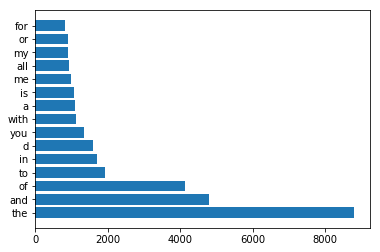

In [54]:
# Create a horizontal graph
words_sel = word_freqs[0:15]
words = [pair[0] for pair in words_sel]
freqs = [pair[1] for pair in words_sel]

height = freqs
bars = words
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show();

*** Does the observed relative frequency of these words follow Zipf’s law?  Explain. ***

From https://nlp.stanford.edu/IR-book/html/htmledition/zipfs-law-modeling-the-distribution-of-terms-1.html
Zipf's law states that the frequency of the nth most common word will be proportional to 1/n.
To test its validity for the selected corpus, we examine side-by-side plots of a Zipf series, and a plot of the word frequencies observed. From a visual examination we can see that the two plots, although not identical, show similar trends or relationships.

In [55]:
zipf_series = [1/n for n in range(1, 16)]

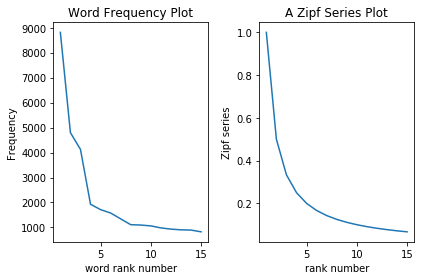

In [56]:
plt.subplot(1, 2, 2)
r = range(1,16)
plt.title("A Zipf Series Plot")
plt.xlabel("rank number")
plt.ylabel("Zipf series")
plt.plot(r, zipf_series);

plt.subplot(1, 2, 1)
plt.title("Word Frequency Plot")
plt.xlabel("word rank number")
plt.ylabel("Frequency")
plt.plot(r, freqs)
plt.tight_layout()
plt.show();

The two plots are similar, showing that Zipf's law, is largely followed.

Finally, we plot observed frequencies on the x-axis vs Zipf series on the y-axis.

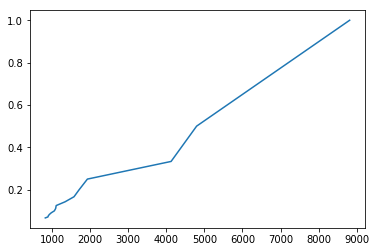

In [57]:
fig = plt.figure()
ax = plt.axes()
ax.plot(freqs, zipf_series);

The plot above suggests a linear relationship between observed frequencies and the terms of the Zipf series.

*** In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.” ***

Since the observed frequencies do seem to largely follow Zipf's law, there does not seem to be a significant difference in that regard.